In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

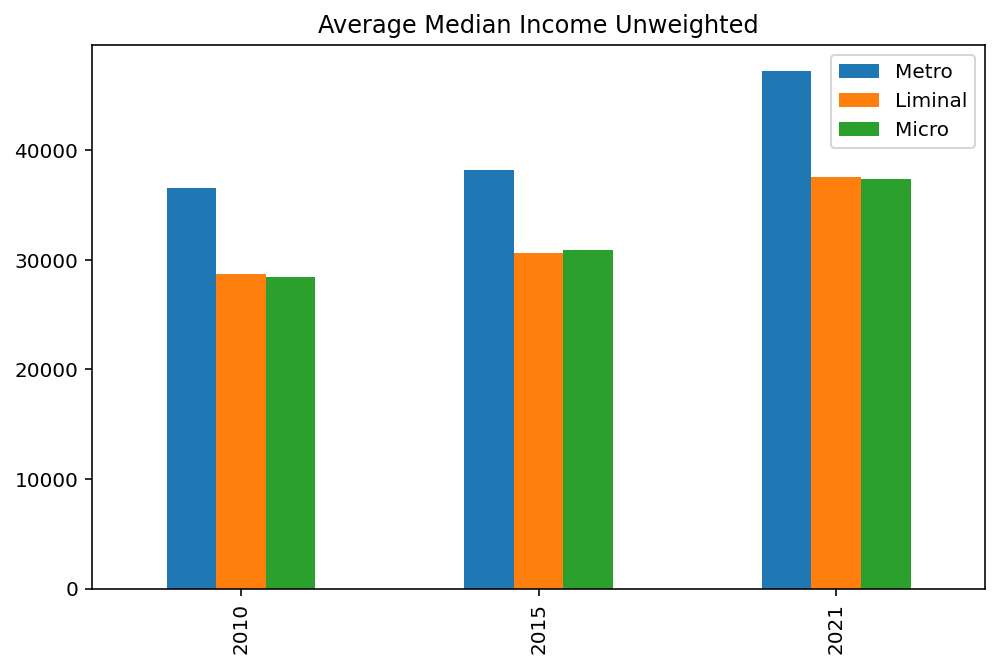

In [3]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    df.loc[year, 'Metro'] = dfY[metro]['Median_Income'].mean()
    df.loc[year, 'Liminal'] = dfY[liminal]['Median_Income'].mean()
    df.loc[year, 'Micro'] = dfY[notLim]['Median_Income'].mean()

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income Unweighted");

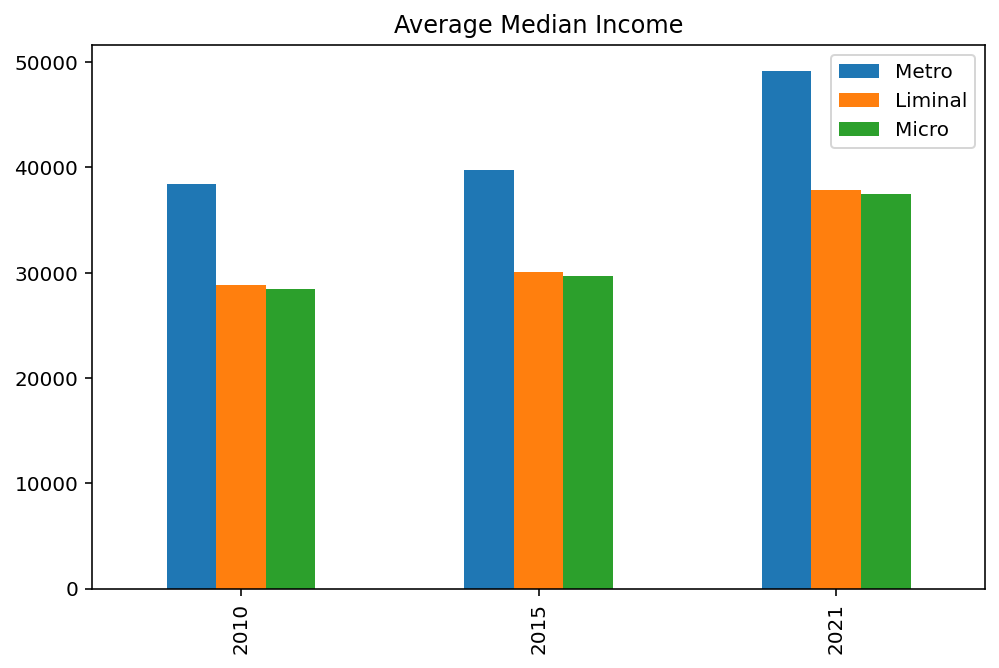

In [4]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    df.loc[year, 'Metro'] = (dfY[metro]['Median_Income'] * dfY[metro]['POPESTIMATE']).sum() / dfY[metro]['POPESTIMATE'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['Median_Income'] * dfY[liminal]['POPESTIMATE']).sum() / dfY[liminal]['POPESTIMATE'].sum()
    df.loc[year, 'Micro'] = (dfY[notLim]['Median_Income'] * dfY[notLim]['POPESTIMATE']).sum() / dfY[notLim]['POPESTIMATE'].sum()

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income");

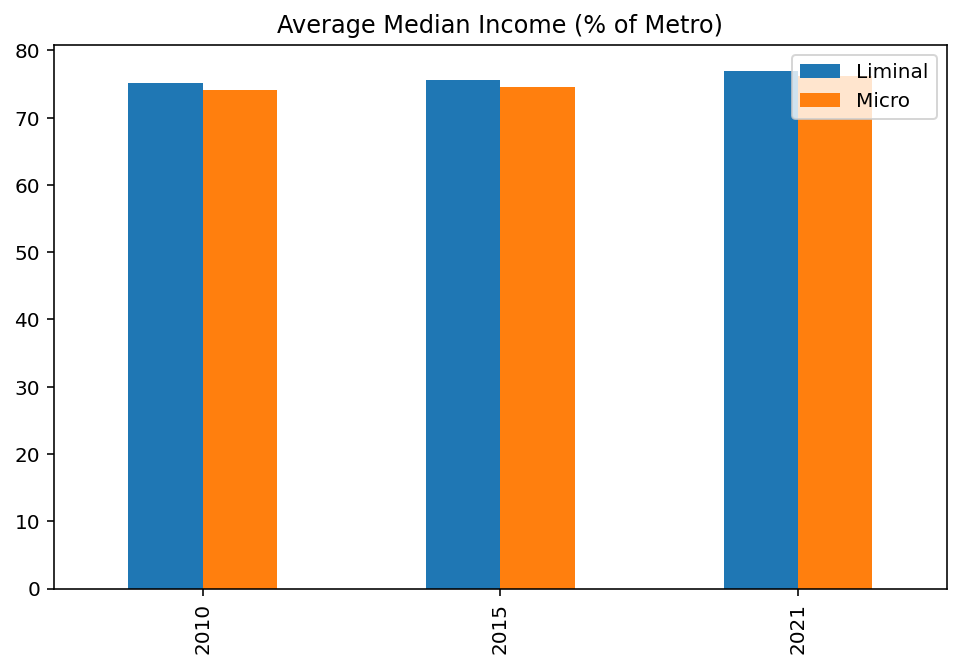

In [5]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    metroInc = (dfY[metro]['Median_Income'] * dfY[metro]['POPESTIMATE']).sum() / dfY[metro]['POPESTIMATE'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['Median_Income'] * dfY[liminal]['POPESTIMATE']).sum() / dfY[liminal]['POPESTIMATE'].sum() / metroInc * 100
    df.loc[year, 'Micro'] = (dfY[notLim]['Median_Income'] * dfY[notLim]['POPESTIMATE']).sum() / dfY[notLim]['POPESTIMATE'].sum() / metroInc * 100

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income (% of Metro)");